In [ ]:
using DynamicalSystems

In [3]:
ds = Systems.thomas_cyclical(b = 0.1665)

3-dimensional continuous dynamical system
 state:       [1.0, 0.0, 0.0]
 rule f:      thomas_rule
 in-place?    false
 jacobian:    thomas_jacob
 parameters:  [0.1665]

In [4]:
xg = yg = zg = range(-6.0, 6.0; length = 251)
mapper = AttractorsViaRecurrences(ds, (xg, yg, zg))
basins, attractors = basins_of_attraction(mapper)
attractors

┌ Info: Automatic Δt estimation yielded Δt = 0.5529879405466888
└ @ ChaosTools C:\Users\olenin.s\.julia\packages\ChaosTools\PHPDF\src\basins\attractor_mapping_recurrences.jl:238
┌ Info: AttractorsViaRecurrences found new attractor with id: 1
└ @ ChaosTools C:\Users\olenin.s\.julia\packages\ChaosTools\PHPDF\src\basins\attractor_mapping_recurrences.jl:412
┌ Info: AttractorsViaRecurrences found new attractor with id: 2
└ @ ChaosTools C:\Users\olenin.s\.julia\packages\ChaosTools\PHPDF\src\basins\attractor_mapping_recurrences.jl:412
┌ Info: AttractorsViaRecurrences found new attractor with id: 3
└ @ ChaosTools C:\Users\olenin.s\.julia\packages\ChaosTools\PHPDF\src\basins\attractor_mapping_recurrences.jl:412
┌ Info: AttractorsViaRecurrences found new attractor with id: 4
└ @ ChaosTools C:\Users\olenin.s\.julia\packages\ChaosTools\PHPDF\src\basins\attractor_mapping_recurrences.jl:412
Basins of attraction:  50%|███████████████              |  ETA: 0:04:30┌ Info: AttractorsViaRecurrences found 

Dict{Int16, Dataset{3, Float64}} with 6 entries:
  5 => 3-dimensional Dataset{Float64} with 1 points
  4 => 3-dimensional Dataset{Float64} with 819 points
  6 => 3-dimensional Dataset{Float64} with 1 points
  2 => 3-dimensional Dataset{Float64} with 807 points
  3 => 3-dimensional Dataset{Float64} with 820 points
  1 => 3-dimensional Dataset{Float64} with 1 points

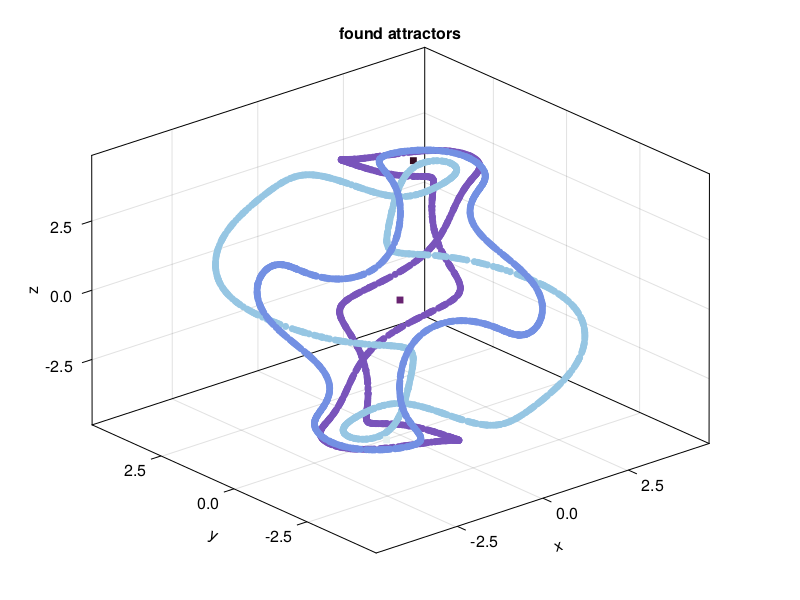

In [11]:
fig = Figure()

ax = fig[1,1] = Axis3(fig; title = "found attractors")
cmap = cgrad(:dense, 6; categorical = true)

for i in keys(attractors)
    
    tr = attractors[i]
    markersize = length(attractors[i]) > 10 ? 2000 : 6000
    marker = length(attractors[i]) > 10 ? :circle : :rect
    
    scatter!(ax, columns(tr)...; marker, transparency = true, color = cmap[i])
    j = findfirst(isequal(i), basins)
    x = xg[j[1]]
    y = yg[j[2]]
    z = zg[j[3]]
    tr = trajectory(ds, 100, SVector(x,y,z); Ttr = 100)
    lines!(ax, columns(tr)...; linewidth = 1.0, color = cmap[i])
end
fig

In [13]:
function newton_map(z, p, n)
    z1 = z[1] + im*z[2]
    dz1 = newton_f(z1, p[1])/newton_df(z1, p[1])
    z1 = z1 - dz1
    return SVector(real(z1), imag(z1))
end
newton_f(x, p) = x^p - 1
newton_df(x, p)= p*x^(p-1)

ds = DiscreteDynamicalSystem(newton_map, [0.1, 0.2], [3.0])
xg = yg = range(-1.5, 1.5; length = 400)
mapper = AttractorsViaRecurrences(ds, (xg, yg))
basins, attractors = basins_of_attraction(mapper; show_progress = false)
basins

400×400 Matrix{Int16}:
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  2  2  2  2  2  2  2  2  2  2  2  2
 1  1  1  1  1  1  1  1  1  1  1  1  1     2  2  2  2  2  2  2  2  2  2  2  2
 1  1  1  1  1  1  1  1  1  1  1  1  1     2  2  2  2  2  2  2  2  2  2  2  2
 1  1  1  1  1  1  1  1  1  1  1  1  1     2  2  2  2  2  2  2  2  2  2  2  2
 1  1  1  1  1  1  1  1  1  1  1  1  1     2  2  2  2  2  2  2  2  2  2  2  2
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  2  2  2  2  2  2  2  2  2  2  2  2
 1  1  1  1  1  1  1  1  1  1  1  1  1     2  2  2  2  2  2  2  2  2  2  2  2
 1  1  1  1  1  1  1  1  1  1  1  1  1     2  2  2  2  2  2  2  2  2  2  2  2
 1  1  1  1  1  1  1  1  1  1  1  1  1     2  2  2  2  2  2  2  2  2  2  2  2
 1  1  1  1  1  1  1  1  1  1  1  1  1     2  2  2  2  2  2  2  2  2  2  2  2
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  2  2  2  2  2  2  2  2  2  2  2  2
 1  1  1  1  1  1  1  1  1  1  1  1  1     2  2  2  2  2  2  2  2  2  2  2  2
 1  1  1  1  1  1  1  1  1  1  1  1  1   

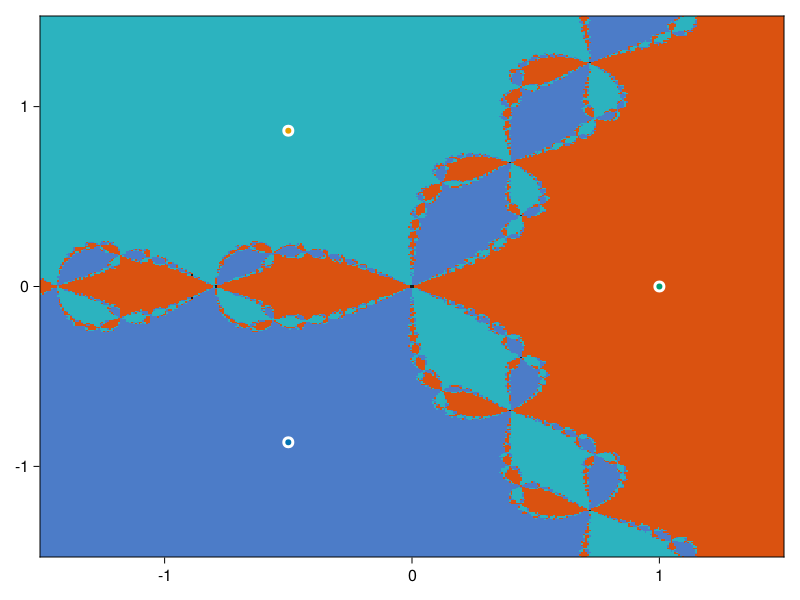

In [15]:
COLORS = [
    "#1B1B1B",
    "#6D44D0",
    "#2CB3BF",
    "#DA5210",
    "#03502A",
    "#866373",
    "white",
    "blue",
]

# Set up some code for plotting attractors
function scatter_attractors!(ax, attractors)
    for k ∈ keys(attractors)
        x, y = columns(attractors[k])
        scatter!(ax, attractors[k].data;
            color = Cycled(k),
            strokewidth = 3, strokecolor = :white
        )
    end
end

generate_cmap(n) = cgrad(COLORS[1:n], n; categorical = true)
ids = sort!(unique(basins))
cmap = generate_cmap(length(ids))

fig, ax = heatmap(xg, yg, basins;
    colormap = cmap, colorrange = (ids[1] - 0.5, ids[end]+0.5),
)
scatter_attractors!(ax, attractors)
fig